## Inference

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
from models.unet import UNet
from inference import InferenceAugmentation, resize, visualize_segmentation_map

/home/yakhyo/miniconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
scale = 0.5
weights_path = "weights/last.pt"
image_path = "assets/image.jpg"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
def load_model(weights_path, device):
    # Initialize the model
    model = UNet(in_channels=3, num_classes=2)

    # Load weights and convert to float32 because weights stored in f16
    state_dict = torch.load(weights_path, map_location=device)
    for key in state_dict.keys():
        state_dict[key] = state_dict[key].float()

    model.load_state_dict(state_dict)
    model.to(device)
    model.eval()

    return model

# load trained weights
model = load_model(weights_path, device)

In [5]:
# load image
image = Image.open(image_path).convert("RGB")
transform = InferenceAugmentation(scale=scale)

input_tensor = transform(image)
input_batch = input_tensor.unsqueeze(0)
input_batch = input_batch.to(device)

# inference
with torch.no_grad():
    output = model(input_batch)[0]

prediction_map = output.argmax(0).cpu().numpy()

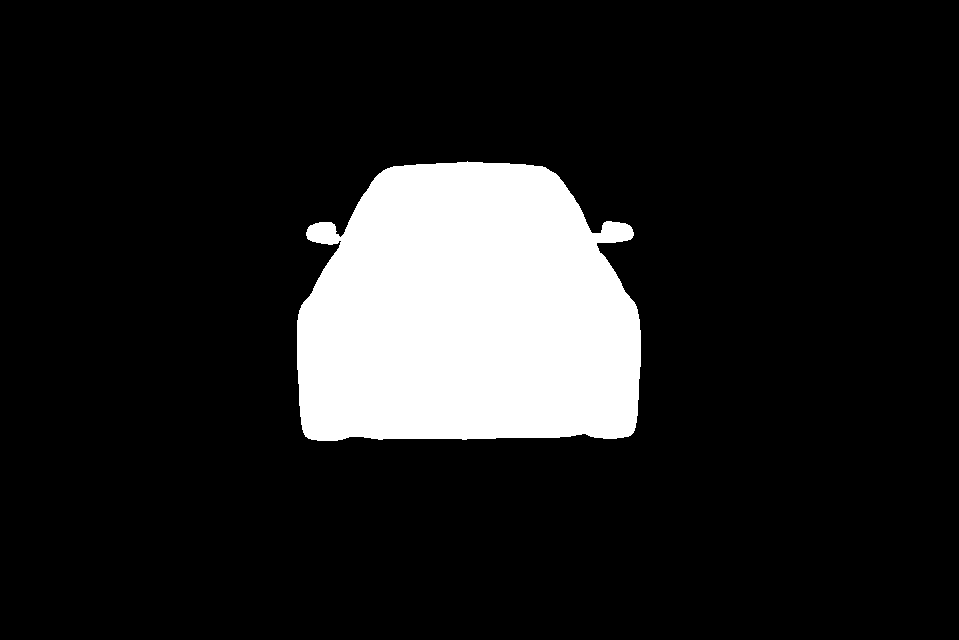

In [6]:
from IPython.display import display

segmentation_image = Image.fromarray((prediction_map * 255).astype(np.uint8))
display(segmentation_image)

In [8]:
image = resize(image, scale)

# returns overlayed image
overlayed_image, colored_class_map = visualize_segmentation_map(image, prediction_map)

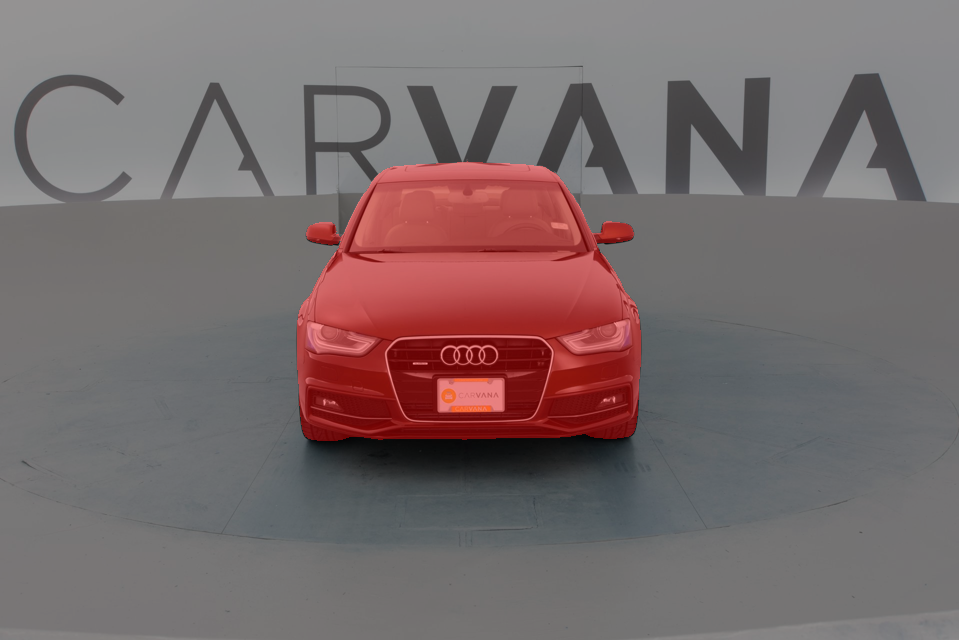

In [12]:
display(Image.fromarray(overlayed_image))

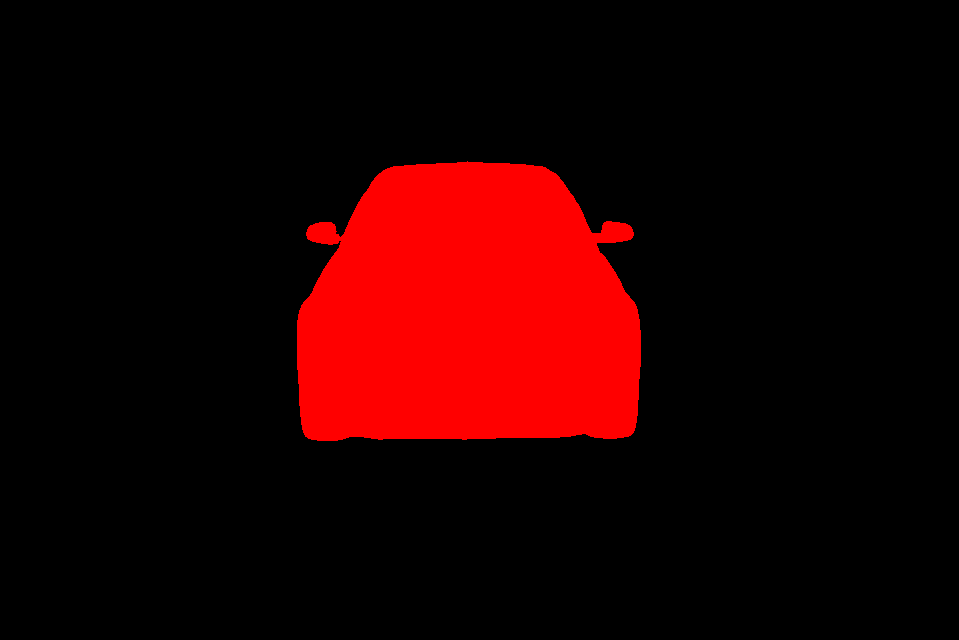

In [13]:
display(Image.fromarray(colored_class_map))